<a href="https://colab.research.google.com/github/EHOVITAUM/Machine_Learnig_Models-/blob/main/credit_risk_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_risk_dataset.csv')

In [ ]:
df.shape

(32581, 12)

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
boxplot = ['person_age','person_income', 'person_emp_length' , 'loan_amnt','loan_int_rate','loan_percent_income']

In [ ]:
original_columns = ['person_age', 'person_income', 'person_home_ownership',
                    'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
                    'loan_int_rate', 'loan_status', 'loan_percent_income',
                    'cb_person_default_on_file', 'cb_person_cred_hist_length']

boxplot_columns = ['person_age', 'person_income', 'person_emp_length',
                   'loan_amnt', 'loan_int_rate', 'loan_percent_income']

remaining_columns = [col for col in original_columns if col not in boxplot_columns]

barplot = remaining_columns

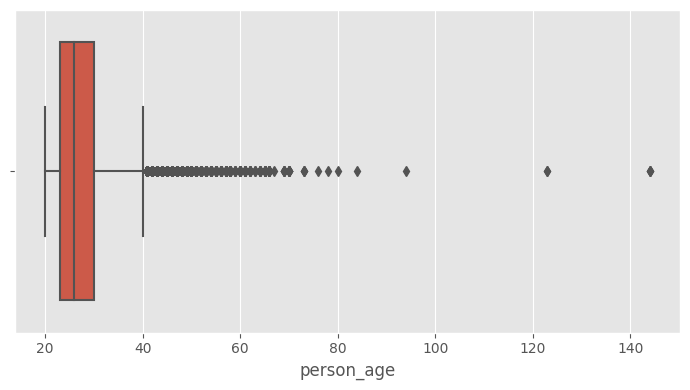

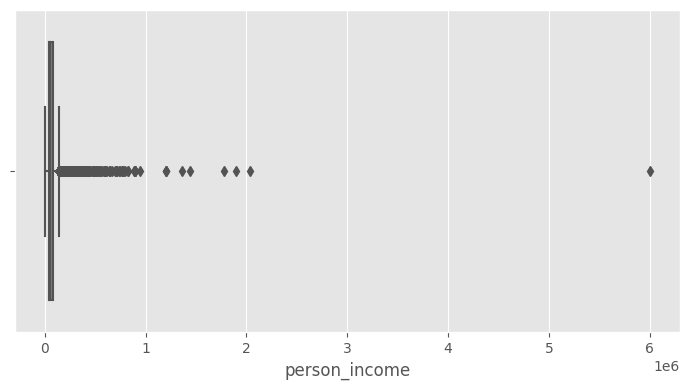

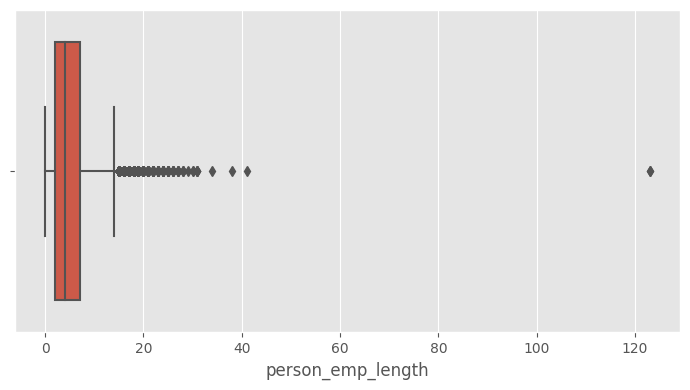

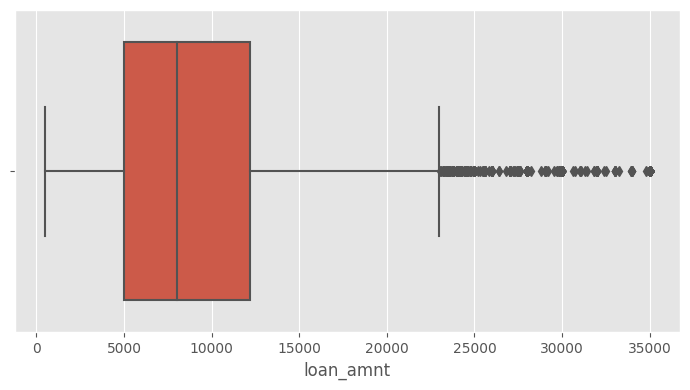

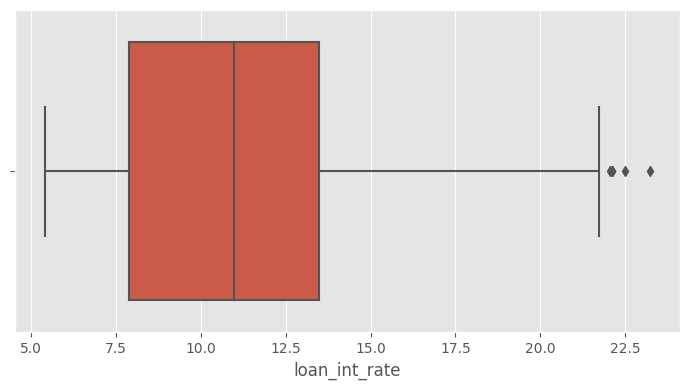

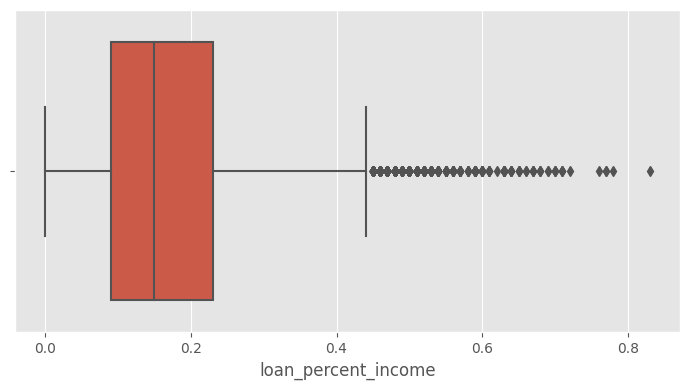

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for coluna in boxplot:
  plt.style.use("ggplot")

  fig, _ = plt.subplots(1, figsize=(7,4))
  ax = sns.boxplot(x=coluna, data=df)
  fig.tight_layout()

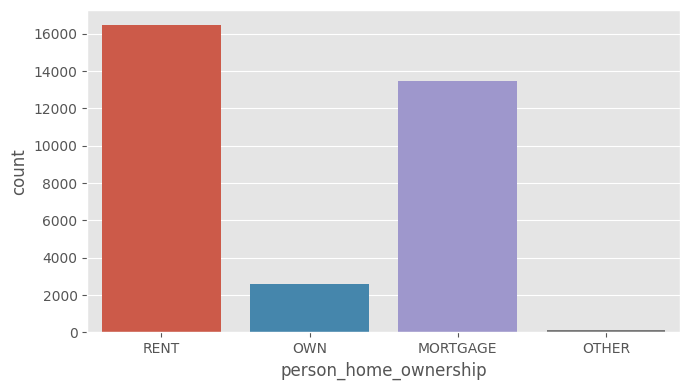

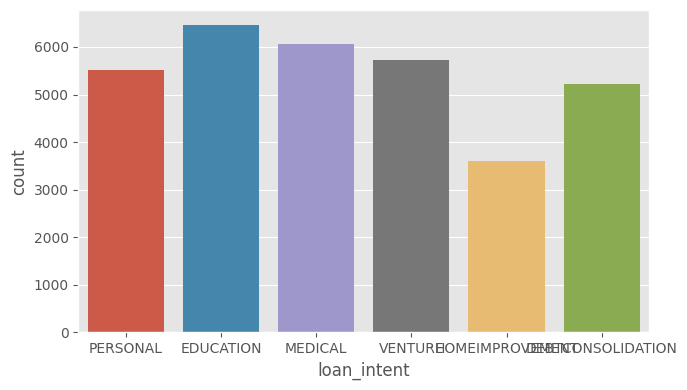

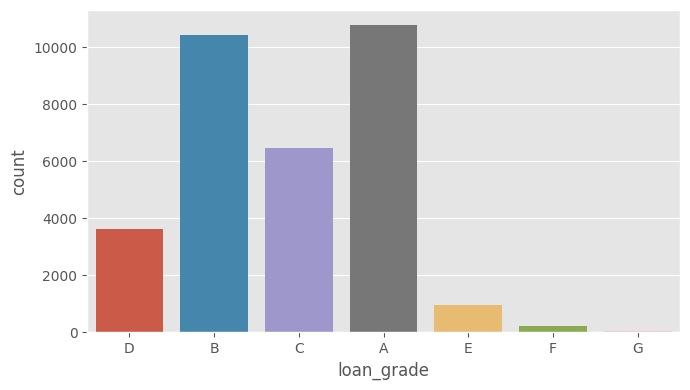

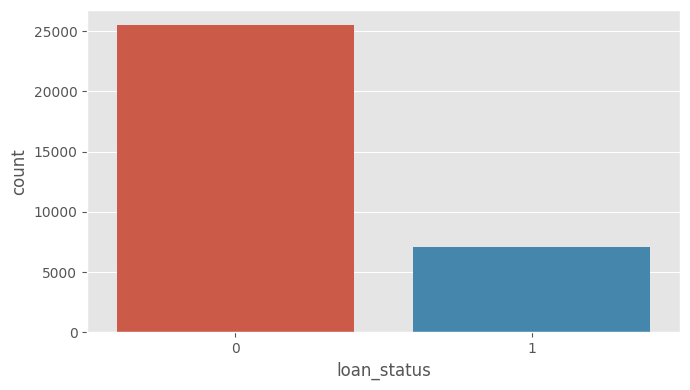

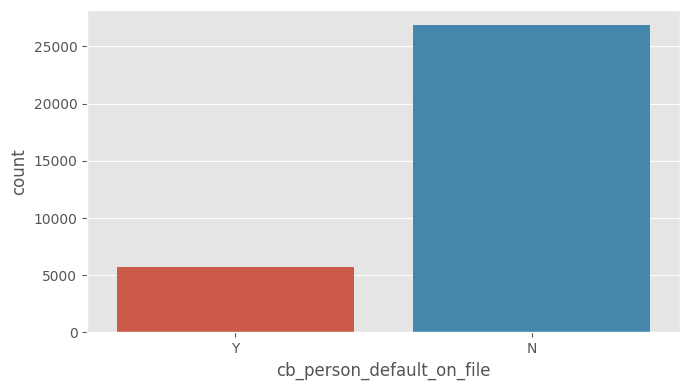

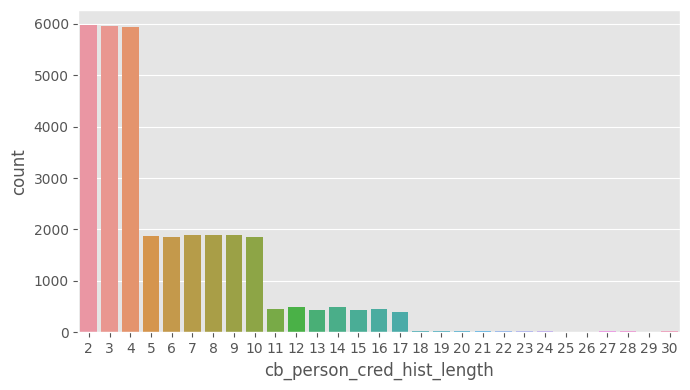

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for coluna in barplot:
  plt.style.use("ggplot")

  fig, _ = plt.subplots(1, figsize=(7,4))
  ax = sns.countplot(x=coluna, data=df)
  fig.tight_layout()

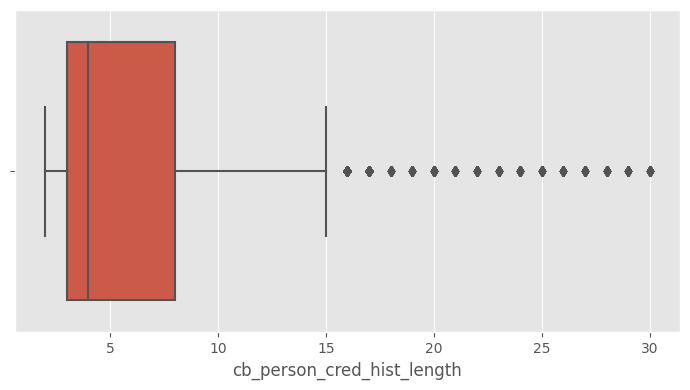

In [ ]:
plt.style.use("ggplot")

fig, _ = plt.subplots(1, figsize=(7,4))
ax = sns.boxplot(x=df['cb_person_cred_hist_length'], data=df)
fig.tight_layout()

In [ ]:
#media de valor de emprestimo concedido
df['loan_amnt'].mean()

9589.371105859243

###Loan status (0 is non default 1 is default)
### 0 não inadimplente / 1 inadimplente

In [ ]:
# numero de situações
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [ ]:
# distribuição de situaçoes (target)
round(df['loan_status'].value_counts() / df.shape[0],2)

0    0.78
1    0.22
Name: loan_status, dtype: float64

### valor estimado de prejuizo  68.158.612

In [ ]:
# valor estimado de prejuizo
7108 * 9589

68158612

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### person_age   max	144.000000


In [ ]:
df.loc[df['person_age'] > 95, 'person_age'] = np.nan

In [ ]:
# idade maxima era 144 , agora 94
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32576.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.718044,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.204990,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,94.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
# quantidade de nulos por coluna
df.isna().sum()

person_age                       5
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
# porcentagem de dados nulos por coluna
round(df.isna().sum() / df.shape[0] * 100, 2)

person_age                    0.02
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.75
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.56
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21.0,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25.0,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23.0,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24.0,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57.0,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54.0,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65.0,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56.0,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


<Axes: xlabel='loan_amnt', ylabel='person_age'>

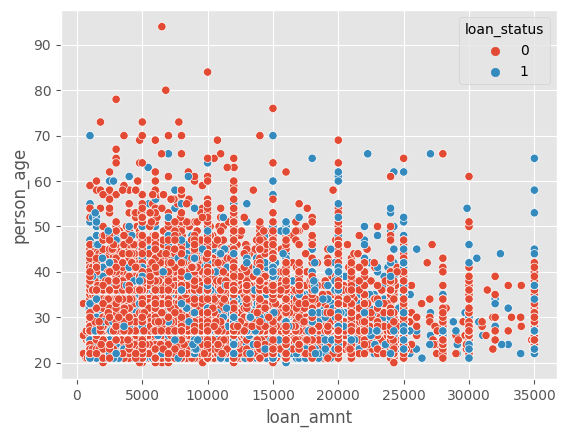

In [ ]:
# grafico de dispersão agrupado pelo target
sns.scatterplot(data=df, x= df['loan_amnt'], y= df['person_age'],hue='loan_status')

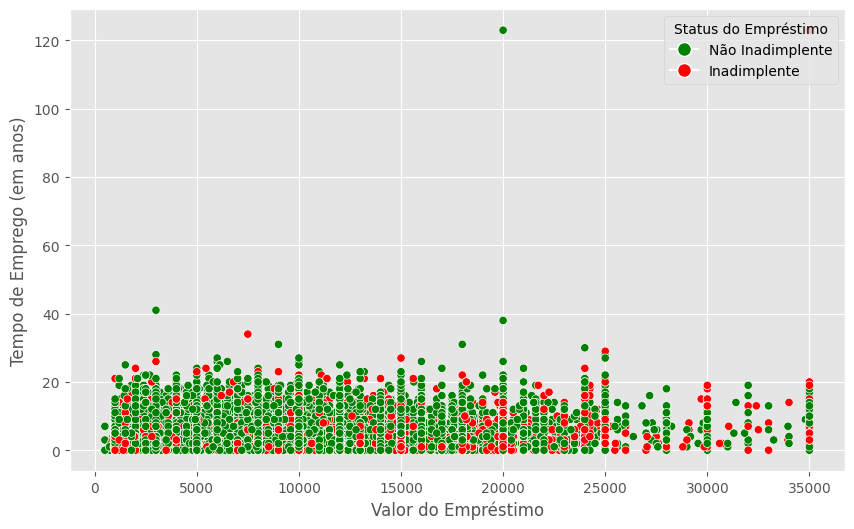

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapeando os valores de 'loan_status' para rótulos legíveis
df['loan_status_label'] = df['loan_status'].map({0: 'Não Inadimplente', 1: 'Inadimplente'})

# Definindo cores para cada categoria
colors = {'Não Inadimplente': 'green', 'Inadimplente': 'red'}

# Criando o scatterplot
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura
sns.scatterplot(data=df, x=df['loan_amnt'], y=df['person_emp_length'], hue='loan_status_label', palette=colors)

# Adicionando uma legenda
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in colors.items()]
plt.legend(handles=legend_labels, title='Status do Empréstimo', loc='upper right')

plt.xlabel('Valor do Empréstimo')
plt.ylabel('Tempo de Emprego (em anos)')
plt.show()


<Axes: xlabel='loan_amnt', ylabel='Density'>

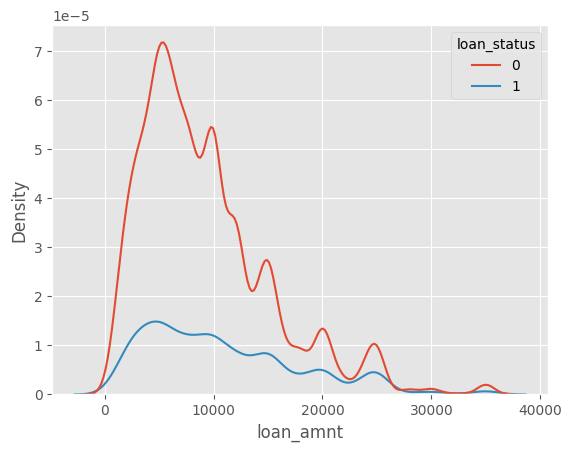

In [ ]:
sns.kdeplot(data= df, x= df['loan_amnt'], hue = 'loan_status')

### Feature engineering

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
df_train, df_test = train_test_split(df, test_size= 0.2, random_state=42)

In [ ]:
df_train.shape, df_test.shape

((26064, 13), (6517, 13))

In [ ]:
df_train


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status_label
32377,64.0,46000,RENT,2.0,PERSONAL,C,4800,11.09,0,0.10,Y,24,Não Inadimplente
1338,26.0,26000,OWN,0.0,DEBTCONSOLIDATION,E,8500,16.45,1,0.33,N,3,Inadimplente
7047,23.0,51000,MORTGAGE,3.0,PERSONAL,C,16000,13.11,0,0.31,Y,3,Não Inadimplente
8225,22.0,56004,MORTGAGE,6.0,MEDICAL,A,6000,7.88,0,0.11,N,4,Não Inadimplente
7178,24.0,79000,RENT,3.0,PERSONAL,C,7000,12.54,0,0.09,N,3,Não Inadimplente
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,39.0,38500,MORTGAGE,7.0,MEDICAL,C,3500,13.98,0,0.09,Y,17,Não Inadimplente
5390,25.0,69000,RENT,5.0,HOMEIMPROVEMENT,A,8500,6.92,1,0.12,N,4,Inadimplente
860,26.0,148000,RENT,1.0,DEBTCONSOLIDATION,E,20000,17.99,1,0.14,N,3,Inadimplente
15795,26.0,175000,MORTGAGE,0.0,PERSONAL,C,15000,NaN,0,0.09,N,3,Não Inadimplente


In [ ]:
b = (df[['person_age','person_income']] / df.max()) ** 2

In [ ]:
a = b[['person_age','person_income']]
a

,person_age,person_income
0,0.054776,0.000097
1,0.049909,0.000003
2,0.070733,0.000003
3,0.059869,0.000119
4,0.065188,0.000082
...,...,...
32576,0.3677,0.000078
32577,0.330014,0.0004
32578,0.478158,0.00016
32579,0.354912,0.000625


In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'loan_status_label'],
      dtype='object')

In [ ]:
'person_age','person_emp_length', 'loan_int_rate'

('person_age', 'person_emp_length', 'loan_int_rate')

In [ ]:
# verificando média de valores das colunas que possuem dados nulos
df_train['person_age'].mean(), df_train['person_emp_length'].mean(), df_train['loan_int_rate'].mean()

(27.747659247889487, 4.787233203140411, 11.010116175535298)

In [ ]:
df_train['person_age'] = df_train['person_age'].fillna(27.747)
df_train['person_emp_length'] = df_train['person_emp_length'].fillna(4.787)
df_train['loan_int_rate'] = df_train['loan_int_rate'].fillna(11.010)


In [ ]:
df_train.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status_label             0
dtype: int64

In [ ]:
df_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status_label
32377,64.0,46000,RENT,2.0,PERSONAL,C,4800,11.09,0,0.10,Y,24,Não Inadimplente
1338,26.0,26000,OWN,0.0,DEBTCONSOLIDATION,E,8500,16.45,1,0.33,N,3,Inadimplente
7047,23.0,51000,MORTGAGE,3.0,PERSONAL,C,16000,13.11,0,0.31,Y,3,Não Inadimplente
8225,22.0,56004,MORTGAGE,6.0,MEDICAL,A,6000,7.88,0,0.11,N,4,Não Inadimplente
7178,24.0,79000,RENT,3.0,PERSONAL,C,7000,12.54,0,0.09,N,3,Não Inadimplente
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,39.0,38500,MORTGAGE,7.0,MEDICAL,C,3500,13.98,0,0.09,Y,17,Não Inadimplente
5390,25.0,69000,RENT,5.0,HOMEIMPROVEMENT,A,8500,6.92,1,0.12,N,4,Inadimplente
860,26.0,148000,RENT,1.0,DEBTCONSOLIDATION,E,20000,17.99,1,0.14,N,3,Inadimplente
15795,26.0,175000,MORTGAGE,0.0,PERSONAL,C,15000,11.01,0,0.09,N,3,Não Inadimplente


In [ ]:
label_home = LabelEncoder()

In [ ]:
df_train['person_home_ownership'] = label_home.fit_transform(df_train['person_home_ownership'])

In [ ]:
df_train # coluna person home ownership recebe label enconder, agora ha somente valores numericos

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status_label
32377,64.0,46000,3,2.0,PERSONAL,C,4800,11.09,0,0.10,Y,24,Não Inadimplente
1338,26.0,26000,2,0.0,DEBTCONSOLIDATION,E,8500,16.45,1,0.33,N,3,Inadimplente
7047,23.0,51000,0,3.0,PERSONAL,C,16000,13.11,0,0.31,Y,3,Não Inadimplente
8225,22.0,56004,0,6.0,MEDICAL,A,6000,7.88,0,0.11,N,4,Não Inadimplente
7178,24.0,79000,3,3.0,PERSONAL,C,7000,12.54,0,0.09,N,3,Não Inadimplente
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,39.0,38500,0,7.0,MEDICAL,C,3500,13.98,0,0.09,Y,17,Não Inadimplente
5390,25.0,69000,3,5.0,HOMEIMPROVEMENT,A,8500,6.92,1,0.12,N,4,Inadimplente
860,26.0,148000,3,1.0,DEBTCONSOLIDATION,E,20000,17.99,1,0.14,N,3,Inadimplente
15795,26.0,175000,0,0.0,PERSONAL,C,15000,11.01,0,0.09,N,3,Não Inadimplente


In [ ]:
one_loan_intent = OneHotEncoder(sparse=False)

In [ ]:
one_loan_intent.fit_transform(df_train['loan_intent'].values.reshape(-1,1  ))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
df_train['loan_intent'].values.reshape(-1,1 )

array([['PERSONAL'],
       ['DEBTCONSOLIDATION'],
       ['PERSONAL'],
       ...,
       ['DEBTCONSOLIDATION'],
       ['PERSONAL'],
       ['VENTURE']], dtype=object)

In [ ]:
df_train['loan_intent'].values

array(['PERSONAL', 'DEBTCONSOLIDATION', 'PERSONAL', ...,
       'DEBTCONSOLIDATION', 'PERSONAL', 'VENTURE'], dtype=object)

In [ ]:
loan_intent_encoded = one_loan_intent.fit_transform(df_train[['loan_intent']])




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
loan_intent_encoded_df = pd.DataFrame(loan_intent_encoded, columns=one_loan_intent.get_feature_names_out(['loan_intent']))


In [ ]:
#df_train = pd.concat([df_train, loan_intent_encoded_df], axis=1)

In [ ]:
df_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status_label
32377,64.0,46000,3,2.0,PERSONAL,C,4800,11.09,0,0.10,Y,24,Não Inadimplente
1338,26.0,26000,2,0.0,DEBTCONSOLIDATION,E,8500,16.45,1,0.33,N,3,Inadimplente
7047,23.0,51000,0,3.0,PERSONAL,C,16000,13.11,0,0.31,Y,3,Não Inadimplente
8225,22.0,56004,0,6.0,MEDICAL,A,6000,7.88,0,0.11,N,4,Não Inadimplente
7178,24.0,79000,3,3.0,PERSONAL,C,7000,12.54,0,0.09,N,3,Não Inadimplente
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,39.0,38500,0,7.0,MEDICAL,C,3500,13.98,0,0.09,Y,17,Não Inadimplente
5390,25.0,69000,3,5.0,HOMEIMPROVEMENT,A,8500,6.92,1,0.12,N,4,Inadimplente
860,26.0,148000,3,1.0,DEBTCONSOLIDATION,E,20000,17.99,1,0.14,N,3,Inadimplente
15795,26.0,175000,0,0.0,PERSONAL,C,15000,11.01,0,0.09,N,3,Não Inadimplente


In [ ]:
df_train = df_train.reset_index(drop=True)

In [ ]:
df_train = pd.concat([df_train, loan_intent_encoded_df], axis=1)


In [ ]:
df_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status_label,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,64.0,46000,3,2.0,PERSONAL,C,4800,11.09,0,0.10,Y,24,Não Inadimplente,0.0,0.0,0.0,0.0,1.0,0.0
1,26.0,26000,2,0.0,DEBTCONSOLIDATION,E,8500,16.45,1,0.33,N,3,Inadimplente,1.0,0.0,0.0,0.0,0.0,0.0
2,23.0,51000,0,3.0,PERSONAL,C,16000,13.11,0,0.31,Y,3,Não Inadimplente,0.0,0.0,0.0,0.0,1.0,0.0
3,22.0,56004,0,6.0,MEDICAL,A,6000,7.88,0,0.11,N,4,Não Inadimplente,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,79000,3,3.0,PERSONAL,C,7000,12.54,0,0.09,N,3,Não Inadimplente,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26059,39.0,38500,0,7.0,MEDICAL,C,3500,13.98,0,0.09,Y,17,Não Inadimplente,0.0,0.0,0.0,1.0,0.0,0.0
26060,25.0,69000,3,5.0,HOMEIMPROVEMENT,A,8500,6.92,1,0.12,N,4,Inadimplente,0.0,0.0,1.0,0.0,0.0,0.0
26061,26.0,148000,3,1.0,DEBTCONSOLIDATION,E,20000,17.99,1,0.14,N,3,Inadimplente,1.0,0.0,0.0,0.0,0.0,0.0
26062,26.0,175000,0,0.0,PERSONAL,C,15000,11.01,0,0.09,N,3,Não Inadimplente,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
loan_intent_encoded_df = loan_intent_encoded_df.reset_index(drop=True)


In [ ]:
# df_train = df_train.drop('loan_intent', axis=1)
# df_train = pd.concat([df_train, loan_intent_encoded_df], axis=1)

In [ ]:
df_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status_label,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,64.0,46000,3,2.0,PERSONAL,C,4800,11.09,0,0.10,Y,24,Não Inadimplente,0.0,0.0,0.0,0.0,1.0,0.0
1,26.0,26000,2,0.0,DEBTCONSOLIDATION,E,8500,16.45,1,0.33,N,3,Inadimplente,1.0,0.0,0.0,0.0,0.0,0.0
2,23.0,51000,0,3.0,PERSONAL,C,16000,13.11,0,0.31,Y,3,Não Inadimplente,0.0,0.0,0.0,0.0,1.0,0.0
3,22.0,56004,0,6.0,MEDICAL,A,6000,7.88,0,0.11,N,4,Não Inadimplente,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,79000,3,3.0,PERSONAL,C,7000,12.54,0,0.09,N,3,Não Inadimplente,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26059,39.0,38500,0,7.0,MEDICAL,C,3500,13.98,0,0.09,Y,17,Não Inadimplente,0.0,0.0,0.0,1.0,0.0,0.0
26060,25.0,69000,3,5.0,HOMEIMPROVEMENT,A,8500,6.92,1,0.12,N,4,Inadimplente,0.0,0.0,1.0,0.0,0.0,0.0
26061,26.0,148000,3,1.0,DEBTCONSOLIDATION,E,20000,17.99,1,0.14,N,3,Inadimplente,1.0,0.0,0.0,0.0,0.0,0.0
26062,26.0,175000,0,0.0,PERSONAL,C,15000,11.01,0,0.09,N,3,Não Inadimplente,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# label_home = LabelEncoder()
# df_train['person_home_ownership'] = label_home.fit_transform(df_train['person_home_ownership'])

In [ ]:
# df_train['loan_intent'].unique()

In [ ]:
# loan_intent_encoded = one_loan_intent.fit_transform(df_train[['loan_intent']])


# # cria um dataframe temporário com as colunas codificadas
# loan_intent_ecoded_df = pd.DataFrame([loan_intent_encoded, columns= one_hot_encoder.get_feaure_names_out], axis=1)

In [ ]:
df_train = df_train.drop('loan_intent',axis=1)

In [ ]:
df_train


,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status_label,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,64.0,46000,3,2.0,C,4800,11.09,0,0.10,Y,24,Não Inadimplente,0.0,0.0,0.0,0.0,1.0,0.0
1,26.0,26000,2,0.0,E,8500,16.45,1,0.33,N,3,Inadimplente,1.0,0.0,0.0,0.0,0.0,0.0
2,23.0,51000,0,3.0,C,16000,13.11,0,0.31,Y,3,Não Inadimplente,0.0,0.0,0.0,0.0,1.0,0.0
3,22.0,56004,0,6.0,A,6000,7.88,0,0.11,N,4,Não Inadimplente,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,79000,3,3.0,C,7000,12.54,0,0.09,N,3,Não Inadimplente,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26059,39.0,38500,0,7.0,C,3500,13.98,0,0.09,Y,17,Não Inadimplente,0.0,0.0,0.0,1.0,0.0,0.0
26060,25.0,69000,3,5.0,A,8500,6.92,1,0.12,N,4,Inadimplente,0.0,0.0,1.0,0.0,0.0,0.0
26061,26.0,148000,3,1.0,E,20000,17.99,1,0.14,N,3,Inadimplente,1.0,0.0,0.0,0.0,0.0,0.0
26062,26.0,175000,0,0.0,C,15000,11.01,0,0.09,N,3,Não Inadimplente,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_train.dtypes

person_age                       float64
person_income                      int64
person_home_ownership              int64
person_emp_length                float64
loan_grade                        object
loan_amnt                          int64
loan_int_rate                    float64
loan_status                        int64
loan_percent_income              float64
cb_person_default_on_file         object
cb_person_cred_hist_length         int64
loan_status_label                 object
loan_intent_DEBTCONSOLIDATION    float64
loan_intent_EDUCATION            float64
loan_intent_HOMEIMPROVEMENT      float64
loan_intent_MEDICAL              float64
loan_intent_PERSONAL             float64
loan_intent_VENTURE              float64
dtype: object

In [ ]:
label_onfile = LabelEncoder()
label_grade = LabelEncoder()

In [ ]:
df_train['cb_person_default_on_file'] = label_onfile.fit_transform(df_train['cb_person_default_on_file'])
df_train['loan_grade'] = label_grade.fit_transform(df_train['loan_grade'])


In [ ]:
df_train = df_train.drop('loan_status_label',axis=1)

In [ ]:
df_train.dtypes

person_age                       float64
person_income                      int64
person_home_ownership              int64
person_emp_length                float64
loan_grade                         int64
loan_amnt                          int64
loan_int_rate                    float64
loan_status                        int64
loan_percent_income              float64
cb_person_default_on_file          int64
cb_person_cred_hist_length         int64
loan_intent_DEBTCONSOLIDATION    float64
loan_intent_EDUCATION            float64
loan_intent_HOMEIMPROVEMENT      float64
loan_intent_MEDICAL              float64
loan_intent_PERSONAL             float64
loan_intent_VENTURE              float64
dtype: object

In [ ]:
df_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,64.0,46000,3,2.0,2,4800,11.09,0,0.10,1,24,0.0,0.0,0.0,0.0,1.0,0.0
1,26.0,26000,2,0.0,4,8500,16.45,1,0.33,0,3,1.0,0.0,0.0,0.0,0.0,0.0
2,23.0,51000,0,3.0,2,16000,13.11,0,0.31,1,3,0.0,0.0,0.0,0.0,1.0,0.0
3,22.0,56004,0,6.0,0,6000,7.88,0,0.11,0,4,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,79000,3,3.0,2,7000,12.54,0,0.09,0,3,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26059,39.0,38500,0,7.0,2,3500,13.98,0,0.09,1,17,0.0,0.0,0.0,1.0,0.0,0.0
26060,25.0,69000,3,5.0,0,8500,6.92,1,0.12,0,4,0.0,0.0,1.0,0.0,0.0,0.0
26061,26.0,148000,3,1.0,4,20000,17.99,1,0.14,0,3,1.0,0.0,0.0,0.0,0.0,0.0
26062,26.0,175000,0,0.0,2,15000,11.01,0,0.09,0,3,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
x_train , y_train = df_train.drop('loan_status', axis=1).values , df_train['loan_status'].values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
normalizador = StandardScaler()
x_ntrain = normalizador.fit_transform(x_train)

In [ ]:
x_ntrain

array([[ 5.80806494, -0.31717677,  0.92404561, ..., -0.47772098,
         2.20806784, -0.45926826],
       [-0.2799962 , -0.63165151,  0.22625263, ..., -0.47772098,
        -0.45288464, -0.45926826],
       [-0.76063261, -0.23855808, -1.16933334, ..., -0.47772098,
         2.20806784, -0.45926826],
       ...,
       [-0.2799962 ,  1.28664442,  0.92404561, ..., -0.47772098,
        -0.45288464, -0.45926826],
       [-0.2799962 ,  1.71118532, -1.16933334, ..., -0.47772098,
         2.20806784, -0.45926826],
       [-0.11978407, -0.01842576, -1.16933334, ..., -0.47772098,
        -0.45288464,  2.17737667]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_sv = RandomForestClassifier()

In [ ]:
rf_sv.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
x_ntrain.ndim

2

In [ ]:
y_train.ndim

1

In [ ]:
rf_sv.feature_importances_

array([0.04537874, 0.14412938, 0.10242975, 0.0621874 , 0.12224454,
       0.06867875, 0.10005579, 0.22347275, 0.01081589, 0.03317692,
       0.0241213 , 0.01028388, 0.01314391, 0.02333432, 0.00911048,
       0.00743618])

In [ ]:
df_train.drop('loan_status', axis=1).columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [ ]:
importance = pd.DataFrame({'columns': df_train.drop('loan_status', axis=1).columns,
              'importance': rf_sv.feature_importances_})
importance

,columns,importance
0,person_age,0.045379
1,person_income,0.144129
2,person_home_ownership,0.102430
3,person_emp_length,0.062187
4,loan_grade,0.122245
5,loan_amnt,0.068679
6,loan_int_rate,0.100056
7,loan_percent_income,0.223473
8,cb_person_default_on_file,0.010816
9,cb_person_cred_hist_length,0.033177


In [ ]:
importance.sort_values('importance',ascending=False)['columns'].values[0:10]

array(['loan_percent_income', 'person_income', 'loan_grade',
       'person_home_ownership', 'loan_int_rate', 'loan_amnt',
       'person_emp_length', 'person_age', 'cb_person_cred_hist_length',
       'loan_intent_DEBTCONSOLIDATION'], dtype=object)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, criterion= 'entropy')

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
rf.predict(x_train)

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
y_train

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
accuracy_score(y_train, rf.predict(x_train))

0.9999616329036218

In [ ]:
df_test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status_label
14668,24.0,28000,OWN,6.0,HOMEIMPROVEMENT,B,10000,10.37,0,0.36,N,2,Não Inadimplente
24614,27.0,64000,RENT,0.0,PERSONAL,C,10000,15.27,0,0.16,Y,10,Não Inadimplente
11096,26.0,72000,MORTGAGE,10.0,EDUCATION,D,16000,NaN,0,0.22,N,3,Não Inadimplente
10424,23.0,27996,RENT,7.0,DEBTCONSOLIDATION,A,10000,NaN,1,0.36,N,2,Inadimplente
26007,30.0,44500,RENT,2.0,MEDICAL,E,13000,16.32,1,0.29,N,6,Inadimplente
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31330,37.0,88000,MORTGAGE,20.0,HOMEIMPROVEMENT,B,9925,NaN,0,0.11,N,16,Não Inadimplente
2862,26.0,64000,RENT,2.0,MEDICAL,A,3000,NaN,0,0.05,N,4,Não Inadimplente
14754,23.0,114000,MORTGAGE,4.0,PERSONAL,B,10000,NaN,0,0.09,N,2,Não Inadimplente
14170,24.0,100000,MORTGAGE,1.0,DEBTCONSOLIDATION,A,6000,NaN,0,0.06,N,3,Não Inadimplente


In [ ]:
df_test['loan_status_label']

14668    Não Inadimplente
24614    Não Inadimplente
11096    Não Inadimplente
10424        Inadimplente
26007        Inadimplente
               ...       
31330    Não Inadimplente
2862     Não Inadimplente
14754    Não Inadimplente
14170    Não Inadimplente
24385    Não Inadimplente
Name: loan_status_label, Length: 6517, dtype: object

In [ ]:
df_test = df_test.drop('loan_status_label', axis=1)

In [ ]:
df_test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
14668,24.0,28000,OWN,6.0,HOMEIMPROVEMENT,B,10000,10.37,0,0.36,N,2
24614,27.0,64000,RENT,0.0,PERSONAL,C,10000,15.27,0,0.16,Y,10
11096,26.0,72000,MORTGAGE,10.0,EDUCATION,D,16000,NaN,0,0.22,N,3
10424,23.0,27996,RENT,7.0,DEBTCONSOLIDATION,A,10000,NaN,1,0.36,N,2
26007,30.0,44500,RENT,2.0,MEDICAL,E,13000,16.32,1,0.29,N,6
...,...,...,...,...,...,...,...,...,...,...,...,...
31330,37.0,88000,MORTGAGE,20.0,HOMEIMPROVEMENT,B,9925,NaN,0,0.11,N,16
2862,26.0,64000,RENT,2.0,MEDICAL,A,3000,NaN,0,0.05,N,4
14754,23.0,114000,MORTGAGE,4.0,PERSONAL,B,10000,NaN,0,0.09,N,2
14170,24.0,100000,MORTGAGE,1.0,DEBTCONSOLIDATION,A,6000,NaN,0,0.06,N,3


In [ ]:
df_test['person_age'] = df_test['person_age'].fillna(27)
df_test['person_emp_length'] = df_test['person_emp_length'].fillna(4.787)
df_test['loan_int_rate'] = df_test['loan_int_rate'].fillna(11.010)


In [ ]:
df_test['person_home_ownership']

14668         OWN
24614        RENT
11096    MORTGAGE
10424        RENT
26007        RENT
           ...   
31330    MORTGAGE
2862         RENT
14754    MORTGAGE
14170    MORTGAGE
24385         OWN
Name: person_home_ownership, Length: 6517, dtype: object

In [ ]:
df_test['person_home_ownership'] = label_home.transform(df_test['person_home_ownership'])

In [ ]:
df_test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
14668,24.0,28000,2,6.0,HOMEIMPROVEMENT,B,10000,10.37,0,0.36,N,2
24614,27.0,64000,3,0.0,PERSONAL,C,10000,15.27,0,0.16,Y,10
11096,26.0,72000,0,10.0,EDUCATION,D,16000,11.01,0,0.22,N,3
10424,23.0,27996,3,7.0,DEBTCONSOLIDATION,A,10000,11.01,1,0.36,N,2
26007,30.0,44500,3,2.0,MEDICAL,E,13000,16.32,1,0.29,N,6
...,...,...,...,...,...,...,...,...,...,...,...,...
31330,37.0,88000,0,20.0,HOMEIMPROVEMENT,B,9925,11.01,0,0.11,N,16
2862,26.0,64000,3,2.0,MEDICAL,A,3000,11.01,0,0.05,N,4
14754,23.0,114000,0,4.0,PERSONAL,B,10000,11.01,0,0.09,N,2
14170,24.0,100000,0,1.0,DEBTCONSOLIDATION,A,6000,11.01,0,0.06,N,3


In [ ]:
df_test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
14668,24.0,28000,2,6.0,HOMEIMPROVEMENT,B,10000,10.37,0,0.36,N,2
24614,27.0,64000,3,0.0,PERSONAL,C,10000,15.27,0,0.16,Y,10
11096,26.0,72000,0,10.0,EDUCATION,D,16000,11.01,0,0.22,N,3
10424,23.0,27996,3,7.0,DEBTCONSOLIDATION,A,10000,11.01,1,0.36,N,2
26007,30.0,44500,3,2.0,MEDICAL,E,13000,16.32,1,0.29,N,6
...,...,...,...,...,...,...,...,...,...,...,...,...
31330,37.0,88000,0,20.0,HOMEIMPROVEMENT,B,9925,11.01,0,0.11,N,16
2862,26.0,64000,3,2.0,MEDICAL,A,3000,11.01,0,0.05,N,4
14754,23.0,114000,0,4.0,PERSONAL,B,10000,11.01,0,0.09,N,2
14170,24.0,100000,0,1.0,DEBTCONSOLIDATION,A,6000,11.01,0,0.06,N,3


In [ ]:
loan_intent_encoded = one_loan_intent.transform(df_test[['loan_intent']])
loan_intent_encoded_df = pd.DataFrame(loan_intent_encoded, columns=one_loan_intent.get_feature_names_out(['loan_intent']))
df_test = df_test.reset_index(drop = True)
loan_intent_encoded_df = loan_intent_encoded_df.reset_index(drop=True)
df_test = pd.concat([df_test, loan_intent_encoded_df], axis=1)
df_test = df_test.drop('loan_intent',axis=1)

df_test['cb_person_default_on_file'] = label_onfile.transform(df_test['cb_person_default_on_file'])
df_test['loan_grade']  = label_grade.transform(df_test['loan_grade'])

x_test, y_test = df_test.drop('loan_status',axis=1).values , df_test['loan_status'].values

In [ ]:
df_test.dtypes

person_age                        float64
person_income                       int64
person_home_ownership               int64
person_emp_length                 float64
loan_grade                          int64
loan_amnt                           int64
loan_int_rate                     float64
loan_status                         int64
loan_percent_income               float64
cb_person_default_on_file           int64
cb_person_cred_hist_length          int64
loan_intent_DEBTCONSOLIDATION     float64
loan_intent_EDUCATION             float64
loan_intent_HOMEIMPROVEMENT       float64
loan_intent_MEDICAL               float64
loan_intent_PERSONAL              float64
loan_intent_VENTURE               float64
probability_of_default            float64
faixas                           category
dtype: object

In [ ]:
x_test

array([[2.40e+01, 2.80e+04, 2.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.70e+01, 6.40e+04, 3.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [2.60e+01, 7.20e+04, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [2.30e+01, 1.14e+05, 0.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [2.40e+01, 1.00e+05, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.80e+01, 7.20e+04, 2.00e+00, ..., 1.00e+00, 0.00e+00, 0.00e+00]])

In [ ]:
rf.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_test, rf.predict(x_test))

0.9323308270676691

In [ ]:
rf.predict_proba(x_test)


array([[0.95, 0.05],
       [0.86, 0.14],
       [0.88, 0.12],
       ...,
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.98, 0.02]])

In [ ]:
df = pd.DataFrame(rf.predict(x_test))

In [ ]:
df

,0
0,0
1,0
2,0
3,1
4,1
...,...
6512,0
6513,0
6514,0
6515,0


In [ ]:
df_test['probability_of_default'] = rf.predict_proba(x_test)[0:,0]

In [ ]:
bins = 5
df_test['faixas'] = pd.cut(df_test['probability_of_default'], bins=bins, labels=[i for i in range(bins)])

In [ ]:
df_excel = df_test

In [ ]:
a = df_test.groupby('faixas').agg({"loan_status":"sum"})

In [ ]:
b = df_test.groupby('faixas').agg({"loan_status":"count"})


In [ ]:
a['count'] = b['loan_status']
a.columns = ['qtde_ruim','qtde_total']
a.reset_index()

,faixas,qtde_ruim,qtde_total
0,0,945,951
1,1,69,75
2,2,58,122
3,3,127,565
4,4,246,4804


In [ ]:
a['pct_bad_rate'] = a ['qtde_ruim']/ a['qtde_total']

In [ ]:
a.to_csv('grafico_cruzado.csv')

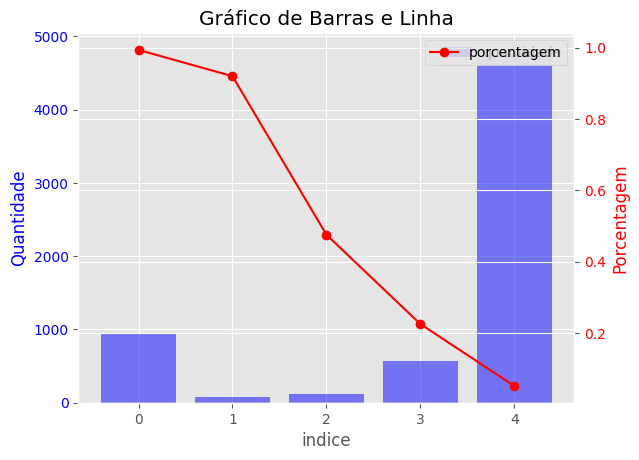

In [ ]:
import matplotlib.pyplot as plt
# Crie uma figura e eixos
fig, ax1 = plt.subplots()

# Crie o primeiro eixo de barras (coluna)
ax1.bar(a.index, a['qtde_total'], color='b', alpha=0.5, label='quantidade')
ax1.set_xlabel('indice')
ax1.set_ylabel('Quantidade', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper right')


# Crie o segundo eixo de linha
ax2 = ax1.twinx()
ax2.plot(a.index, a['pct_bad_rate'], color='r', marker='o',label='porcentagem')
ax2.set_ylabel('Porcentagem', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc="upper right")

# Adicione um título ao gráfico
plt.title('Gráfico de Barras e Linha')

# Mostrar o gráfico
plt.show()


In [ ]:
a

,qtde_ruim,qtde_total,pct_bad_rate
faixas,,,
0,945,951,0.993691
1,69,75,0.920000
2,58,122,0.475410
3,127,565,0.224779
4,246,4804,0.051207


In [ ]:
x_test

array([[2.40e+01, 2.80e+04, 2.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.70e+01, 6.40e+04, 3.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [2.60e+01, 7.20e+04, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [2.30e+01, 1.14e+05, 0.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [2.40e+01, 1.00e+05, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.80e+01, 7.20e+04, 2.00e+00, ..., 1.00e+00, 0.00e+00, 0.00e+00]])